   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.7/372.7 kB 5.4 MB/s eta 0:00:00
Data shape: (100, 275, 1)
Approx silhouette score (on flattened series): 0.272


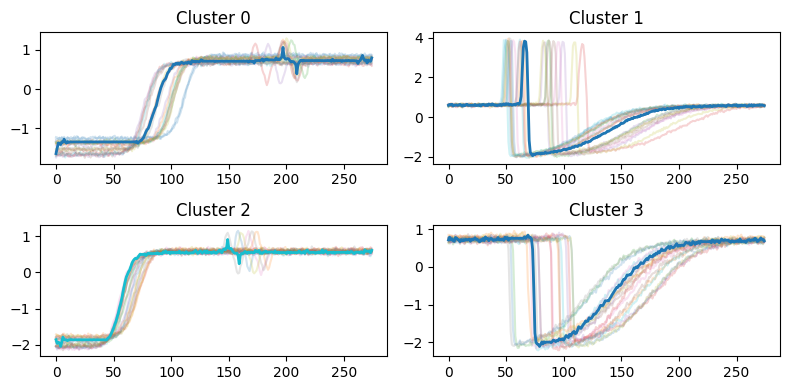

In [1]:
# ==== Cell 1: Install ====
!pip install tslearn

# ==== Cell 2: Imports ====
import numpy as np
import matplotlib.pyplot as plt
from tslearn.datasets import CachedDatasets
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score

plt.rcParams["figure.figsize"] = (8, 4)

# ==== Cell 3: Load a benchmark time-series dataset ====
# Trace dataset: multivariate sensor-style series
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

# We just cluster train set
X = X_train.astype(float)

print("Data shape:", X.shape)  # (n_ts, ts_length, n_dims)

# ==== Cell 4: Fit TimeSeriesKMeans with DTW ====
n_clusters = 4
model = TimeSeriesKMeans(
    n_clusters=n_clusters,
    metric="dtw",
    max_iter=20,
    random_state=42,
    n_init=2,
)
labels = model.fit_predict(X)

# Flatten for silhouette over DTW barycentric distances (approx)
X_flat = X.reshape(X.shape[0], -1)
sil = silhouette_score(X_flat, labels)
print(f"Approx silhouette score (on flattened series): {sil:.3f}")

# ==== Cell 5: Plot cluster centroids ====
for k in range(n_clusters):
    plt.subplot(2, 2, k + 1)
    for ts in X[labels == k][:20]:  # show up to 20 series per cluster
        plt.plot(ts.ravel(), alpha=0.2)
    plt.plot(model.cluster_centers_[k].ravel(), linewidth=2)
    plt.title(f"Cluster {k}")
plt.tight_layout()
plt.show()
